In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

In [2]:
# loading the datasets

train = pd.read_csv('Data/digit-recognizer/train.csv')
test = pd.read_csv('Data/digit-recognizer/test.csv')

print(train.shape, test.shape)

(42000, 785) (28000, 784)


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# abstraction of features and label from the dataset

X, y = train.drop('label', axis=1), train.label
print(X.shape, y.shape)

(42000, 784) (42000,)


In [53]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

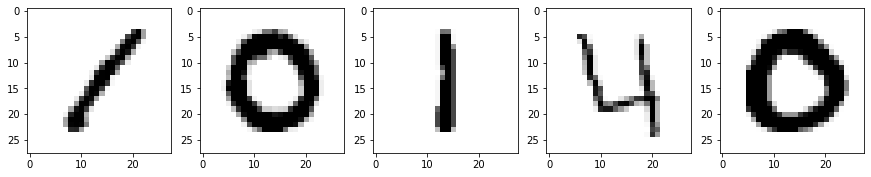

In [29]:
# analysis of the photos

v = np.array(X).reshape(-1, 28, 28, 1) / 255

fig, ax = plt.subplots(1, 5, figsize=(15,8))
for i in range(5):
    ax[i].imshow(v[i], cmap='binary')

In [25]:
X = np.array(X)
X = X / 255.0

X = X.reshape((-1, 784))
X.shape

(42000, 784)

In [32]:
test = np.array(test)
test = test / 255.0

test = test.reshape((-1, 784))
test.shape

(28000, 784)

In [26]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [82]:
# applying supervised machine learning

model = Sequential()
model.add(Dense(64, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [84]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, to_categorical(y), epochs=10, batch_size=32, shuffle=False)

Epoch 1/20
1313/1313 [==============================] - 1s 856us/step - loss: 0.0325 - accuracy: 0.9892
Epoch 2/20
1313/1313 [==============================] - 1s 822us/step - loss: 0.0290 - accuracy: 0.9907
Epoch 3/20
1313/1313 [==============================] - 1s 809us/step - loss: 0.0264 - accuracy: 0.9916
Epoch 4/20
1313/1313 [==============================] - 1s 810us/step - loss: 0.0256 - accuracy: 0.9921
Epoch 5/20
1313/1313 [==============================] - 1s 818us/step - loss: 0.0231 - accuracy: 0.9925
Epoch 6/20
1313/1313 [==============================] - 1s 805us/step - loss: 0.0232 - accuracy: 0.9928
Epoch 7/20
1313/1313 [==============================] - 1s 809us/step - loss: 0.0237 - accuracy: 0.9925
Epoch 8/20
1313/1313 [==============================] - 1s 815us/step - loss: 0.0183 - accuracy: 0.9945
Epoch 9/20
1313/1313 [==============================] - 1s 818us/step - loss: 0.0179 - accuracy: 0.9941
Epoch 10/20
1313/1313 [==============================] - 1s 866u

In [85]:
pred = np.argmax(model.predict(test), axis=-1)
pred

array([2, 0, 9, ..., 3, 9, 2])

In [87]:
df = pd.DataFrame(pred)
df['ImageId'] = df.index + 1
df.rename(columns={0: 'Label'}, inplace=True)
df = df[['ImageId', 'Label']]

In [88]:
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
